In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train=pd.read_csv("Dataset/Train.csv",index_col="Employee_ID")
test=pd.read_csv("Dataset/Test.csv",index_col="Employee_ID")
sample_sub=pd.read_csv("Dataset/sample_submission.csv")

In [64]:
y=train.Attrition_rate
train.drop(["Attrition_rate"],axis=1,inplace=True)

In [65]:
print(train.shape)
print(test.shape)

(7000, 22)
(3000, 22)


In [66]:
train.nunique()

Gender                        2
Age                          47
Education_Level               5
Relationship_Status           2
Hometown                      5
Unit                         12
Decision_skill_possess        4
Time_of_service              44
Time_since_promotion          5
growth_rate                  55
Travel_Rate                   3
Post_Level                    5
Pay_Scale                    10
Compensation_and_Benefits     5
Work_Life_balance             5
VAR1                          5
VAR2                          5
VAR3                          5
VAR4                          3
VAR5                          5
VAR6                          5
VAR7                          5
dtype: int64

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, EID_23371 to EID_1640
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     7000 non-null   object 
 1   Age                        6588 non-null   float64
 2   Education_Level            7000 non-null   int64  
 3   Relationship_Status        7000 non-null   object 
 4   Hometown                   7000 non-null   object 
 5   Unit                       7000 non-null   object 
 6   Decision_skill_possess     7000 non-null   object 
 7   Time_of_service            6856 non-null   float64
 8   Time_since_promotion       7000 non-null   int64  
 9   growth_rate                7000 non-null   int64  
 10  Travel_Rate                7000 non-null   int64  
 11  Post_Level                 7000 non-null   int64  
 12  Pay_Scale                  6991 non-null   float64
 13  Compensation_and_Benefits  7000 non-null 

In [68]:
train.Age.value_counts()

22.0    235
25.0    235
27.0    231
31.0    218
54.0    212
60.0    211
26.0    210
37.0    208
35.0    205
52.0    199
28.0    194
47.0    193
42.0    193
30.0    191
32.0    189
24.0    185
45.0    184
21.0    171
65.0    152
19.0    151
23.0    148
59.0    136
20.0    122
58.0    122
29.0    115
36.0    106
33.0    104
51.0    103
50.0    101
34.0     99
46.0     98
49.0     97
64.0     95
55.0     94
56.0     94
43.0     93
41.0     92
57.0     92
38.0     89
53.0     88
44.0     85
39.0     83
40.0     81
48.0     79
63.0     73
62.0     69
61.0     63
Name: Age, dtype: int64

We have 47 unique values of Age of Employees, so we have divide these age into Age Groups.
1. Grp1 ---> -22 
2. Grp2 ---> 23-30
3. Grp3 ---> 31-45
4. Grp4 ---> 46-60
5. Grp5 ---> 60+

In [69]:
train["Age_Grp"]=None

train.loc[train['Age']<=22, 'Age_Grp']=0
train.loc[(train['Age']>22) & (train['Age']<=30), 'Age_Grp']=1
train.loc[(train['Age']>30) & (train['Age']<=45), 'Age_Grp']=2
train.loc[(train['Age']>45) & (train['Age']<=60), 'Age_Grp']=3
train.loc[train['Age']>60, 'Age_Grp']=4

train.drop(["Age"],axis=1,inplace=True)

In [70]:
test["Age_Grp"]=None

test.loc[test['Age']<=22, 'Age_Grp']=0
test.loc[(test['Age']>22) & (test['Age']<=30), 'Age_Grp']=1
test.loc[(test['Age']>30) & (test['Age']<=45), 'Age_Grp']=2
test.loc[(test['Age']>45) & (test['Age']<=60), 'Age_Grp']=3
test.loc[test['Age']>60, 'Age_Grp']=4

test.drop(["Age"],axis=1,inplace=True)

In [71]:
train.Age_Grp.fillna(2,inplace=True)
test.Age_Grp.fillna(2,inplace=True)

In [72]:
train.Time_of_service.value_counts()

6.0     545
5.0     503
3.0     471
4.0     439
2.0     297
8.0     276
7.0     258
10.0    218
9.0     205
13.0    195
12.0    191
15.0    178
11.0    178
14.0    175
0.0     162
18.0    154
16.0    150
22.0    146
20.0    142
21.0    137
24.0    129
1.0     127
17.0    124
19.0    122
23.0    118
25.0    117
27.0    114
28.0    113
26.0    109
30.0     98
31.0     86
29.0     82
33.0     71
32.0     65
35.0     60
34.0     55
37.0     51
36.0     51
38.0     48
39.0     29
40.0     24
41.0     18
42.0     17
43.0      8
Name: Time_of_service, dtype: int64

We have 44 unique values of Service time. We will solve this problem similarly as we have done with Age. We will divide the Time_of_service into following categories:
1. 0-2 yrs --->0
2. 3-8 yrs --->1
3. 9-15 yrs -->2
4. 16-22 yrs ->3
5. 23-30 yrs ->4
6. 30 yrs+ --->5

In [73]:
train["Time_Serv_Grp"]=None

train.loc[train['Time_of_service']<=2, 'Time_Serv_Grp']=0
train.loc[(train['Time_of_service']>2) & (train['Time_of_service']<=8), 'Time_Serv_Grp']=1
train.loc[(train['Time_of_service']>8) & (train['Time_of_service']<=15), 'Time_Serv_Grp']=2
train.loc[(train['Time_of_service']>15) & (train['Time_of_service']<=22), 'Time_Serv_Grp']=3
train.loc[(train['Time_of_service']>22) & (train['Time_of_service']<=30), 'Time_Serv_Grp']=4
train.loc[train['Time_of_service']>30, 'Time_Serv_Grp']=5

train.drop(["Time_of_service"],axis=1,inplace=True)

In [74]:
test["Time_Serv_Grp"]=None

test.loc[test['Time_of_service']<=2, 'Time_Serv_Grp']=0
test.loc[(test['Time_of_service']>2) & (test['Time_of_service']<=8), 'Time_Serv_Grp']=1
test.loc[(test['Time_of_service']>8) & (test['Time_of_service']<=15), 'Time_Serv_Grp']=2
test.loc[(test['Time_of_service']>15) & (test['Time_of_service']<=22), 'Time_Serv_Grp']=3
test.loc[(test['Time_of_service']>22) & (test['Time_of_service']<=30), 'Time_Serv_Grp']=4
test.loc[test['Time_of_service']>30, 'Time_Serv_Grp']=5

test.drop(["Time_of_service"],axis=1,inplace=True)

In [75]:
train.Time_Serv_Grp.fillna(1,inplace=True)
test.Time_Serv_Grp.fillna(1,inplace=True)

In [76]:
train.growth_rate.value_counts()

45    147
64    147
51    145
61    143
59    141
24    140
56    140
58    140
37    139
52    139
30    138
34    137
54    136
23    136
67    135
29    135
32    135
66    135
31    134
49    133
42    133
62    132
27    131
39    130
70    130
25    130
69    129
57    129
68    128
28    128
71    128
50    127
48    126
60    126
33    125
55    125
41    124
20    123
73    122
44    121
40    121
36    120
43    118
38    117
72    116
21    113
22    113
63    112
46    112
47    110
74    107
35    107
65    107
53    106
26     99
Name: growth_rate, dtype: int64

In [77]:
train["Growth_Rate"]=None

train.loc[train['growth_rate']<=20, 'Growth_Rate']=0
train.loc[(train['growth_rate']>20) & (train['growth_rate']<=40), 'Growth_Rate']=1
train.loc[(train['growth_rate']>40) & (train['growth_rate']<=60), 'Growth_Rate']=2
train.loc[(train['growth_rate']>60) & (train['growth_rate']<=80), 'Growth_Rate']=3
train.loc[train['growth_rate']>80, 'Growth_Rate']=4

train.drop(["growth_rate"],axis=1,inplace=True)

In [78]:
test["Growth_Rate"]=None

test.loc[test['growth_rate']<=20, 'Growth_Rate']=0
test.loc[(test['growth_rate']>20) & (test['growth_rate']<=40), 'Growth_Rate']=1
test.loc[(test['growth_rate']>40) & (test['growth_rate']<=60), 'Growth_Rate']=2
test.loc[(test['growth_rate']>60) & (test['growth_rate']<=80), 'Growth_Rate']=3
test.loc[test['growth_rate']>80, 'Growth_Rate']=4

test.drop(["growth_rate"],axis=1,inplace=True)

In [79]:
train.Pay_Scale.fillna(5.0,inplace=True)
test.Pay_Scale.fillna(5.0,inplace=True)

In [80]:
train.Work_Life_balance.fillna(1.0,inplace=True)
test.Work_Life_balance.fillna(1.0,inplace=True)

In [81]:
train.VAR2.fillna(0.7516,inplace=True)
test.VAR2.fillna(0.7516,inplace=True)

train.VAR4.fillna(2.0,inplace=True)
test.VAR4.fillna(2.0,inplace=True)

In [82]:
from sklearn.model_selection import train_test_split

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(train, y, train_size=0.9, test_size=0.1, random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 13 and 
                        X_train_full[cname].dtype == "object"]

# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = test[my_cols].copy()

# One-hot encode the data (to shorten the code, we use pandas)
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

In [108]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.kernel_ridge import KernelRidge

from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_valid)
mae = mean_absolute_error(predictions, y_valid)
print("MAE of RandomForestRegressor:" , mae)

model = ExtraTreesRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_valid)
mae = mean_absolute_error(predictions, y_valid)
print("MAE of ExtraTreesRegressor:" , mae)

model = AdaBoostRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_valid)
mae = mean_absolute_error(predictions, y_valid)
print("MAE of AdaBoostRegressor:" , mae)

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_valid)
mae = mean_absolute_error(predictions, y_valid)
print("MAE of GradientBoostingRegressor:" , mae)

model = SVR()
model.fit(X_train, y_train)
predictions = model.predict(X_valid)
mae = mean_absolute_error(predictions, y_valid)
print("MAE of SVR:" , mae)

model = Lasso()
model.fit(X_train, y_train)
predictions = model.predict(X_valid)
mae = mean_absolute_error(predictions, y_valid)
print("MAE of Lasso:" , mae)

model = XGBRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_valid)
mae = mean_absolute_error(predictions, y_valid)
print("MAE of XGB:" , mae)

model = LGBMRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_valid)
mae = mean_absolute_error(predictions, y_valid)
print("MAE of LGBM:" , mae)

model = KernelRidge()
model.fit(X_train, y_train)
predictions = model.predict(X_valid)
mae = mean_absolute_error(predictions, y_valid)
print("MAE of ridge:" , mae)

model = ElasticNet()
model.fit(X_train, y_train)
predictions = model.predict(X_valid)
mae = mean_absolute_error(predictions, y_valid)
print("MAE of ElasticNet:" , mae)

MAE of RandomForestRegressor: 0.146782753654195
MAE of ExtraTreesRegressor: 0.14852884726190477
MAE of AdaBoostRegressor: 0.1683313200017967
MAE of GradientBoostingRegressor: 0.14123989104663326
MAE of SVR: 0.1337478504949165
MAE of Lasso: 0.13826504063492062
[08:19:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE of XGB: 0.14087310723079952
MAE of LGBM: 0.14310598296491386
MAE of ridge: 0.14032699743904048
MAE of ElasticNet: 0.13826504063492062


MAE of SVR with ep=0.001000 and C=0.010000: 0.129884
MAE of SVR with ep=0.001000 and C=0.005000: 0.129783
MAE of SVR with ep=0.001000 and C=0.010000: 0.129884
MAE of SVR with ep=0.001000 and C=0.050000: 0.130332
MAE of SVR with ep=0.001000 and C=0.100000: 0.130633
MAE of SVR with ep=0.005000 and C=0.010000: 0.129885
MAE of SVR with ep=0.005000 and C=0.005000: 0.129762
MAE of SVR with ep=0.005000 and C=0.010000: 0.129885
MAE of SVR with ep=0.005000 and C=0.050000: 0.130456
MAE of SVR with ep=0.005000 and C=0.100000: 0.130711
MAE of SVR with ep=0.010000 and C=0.010000: 0.129776
MAE of SVR with ep=0.010000 and C=0.005000: 0.129676
MAE of SVR with ep=0.010000 and C=0.010000: 0.129776
MAE of SVR with ep=0.010000 and C=0.050000: 0.130540
MAE of SVR with ep=0.010000 and C=0.100000: 0.130715
MAE of SVR with ep=0.050000 and C=0.010000: 0.130080
MAE of SVR with ep=0.050000 and C=0.005000: 0.129956
MAE of SVR with ep=0.050000 and C=0.010000: 0.130080
MAE of SVR with ep=0.050000 and C=0.050000: 0.

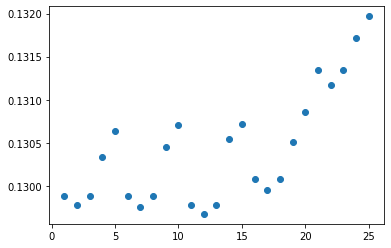

In [51]:
epsilon = [0.001,0.005,0.01,0.05,0.1]
C = [0.01,0.005,0.01,0.05,0.1]

# Obtain all possible combinations
grid_search = [ (ep, c) for ep in epsilon for c in C]
val_acc=[]

for ep, c in grid_search:
  model = SVR(epsilon=ep,C=c)
  model.fit(X_train, y_train)
  predictions = model.predict(X_valid)
  mae = mean_absolute_error(predictions, y_valid)
  val_acc.append(mae)
  print("MAE of SVR with ep=%f and C=%f: %f" % (ep,c,mae))

x_axis=np.arange(1,26)
plt.scatter(x=x_axis,y=val_acc)

[07:51:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE of XGB with lr=0.001000 and n=100.000000: 0.326292
[07:51:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE of XGB with lr=0.001000 and n=200.000000: 0.305416
[07:51:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE of XGB with lr=0.001000 and n=500.000000: 0.255120
[07:51:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE of XGB with lr=0.001000 and n=1000.000000: 0.201267
[07:51:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE of XGB with lr=0.001000 and n=1200.000000: 0.186945
[07:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now de

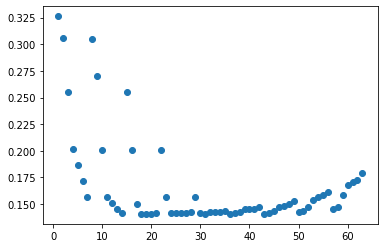

In [59]:
n_estimators = [100,200,500,1000,1200,1500,2000]
learning_rate = [0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5]

# Obtain all possible combinations
grid_search = [ (lr, n) for lr in learning_rate for n in n_estimators]
val_acc=[]

for lr, n in grid_search:
  model = XGBRegressor(n_estimators=n,learning_rate=lr)
  model.fit(X_train, y_train)
  predictions = model.predict(X_valid)
  mae = mean_absolute_error(predictions, y_valid)
  val_acc.append(mae)
  print("MAE of XGB with lr=%f and n=%f: %f" % (lr,n,mae))

x_axis=np.arange(1,64)
plt.scatter(x=x_axis,y=val_acc)

In [115]:
model = Lasso()
model.fit(X_train, y_train)
predictions = model.predict(X_valid)
mae = mean_absolute_error(predictions, y_valid)
print("MAE of SVR:" , mae)

# Get predictions
predictions_1 = model.predict(X_test)

MAE of SVR: 0.1396859198018576


In [116]:
# Save test predictions to file
output = pd.DataFrame({'Employee_ID': X_test.index,
                       'Attrition_rate': predictions_1})
output.to_csv('submission.csv', index=False)